In [1]:
import pandas as pd
loc42= pd.read_csv('42-17.01.29-02.04.csv')
print(loc42)

     Unnamed: 0   Unnamed: 1                  Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                         NaN        NaN   
1           NaN     SITE NO:  42 - Melville Drive 1 Main        NaN   
2           NaN        Date:                    29/01/17        NaN   
3           NaN   Direction:                                    NaN   
4           NaN          NaN                         NaN        NaN   
5           NaN         Hour                         P/C    P/C Kph   
6           NaN  00.00-00.59                           3         17   
7           NaN  01.00-01.59                           5         18   
8           NaN  02.00-02.59                           3         15   
9           NaN  03.00-03.59                           0          0   
10          NaN  04.00-04.59                           0          0   
11          NaN  05.00-05.59                           0          0   
12          NaN  06.00-06.59                           0          0   
13    

In [2]:
loc42 = loc42.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Melville Drive 1 Main - DAILY FLOW BY HOUR')
loc42.drop(loc42.index[[0,1,2,3,4,5]], inplace=True)
loc42.drop(loc42.columns[[0,5]], axis=1, inplace=True)
loc42.index = loc42.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc42.rename(columns=newcols, inplace=True)
loc42

Melville Drive 1 Main - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,3,17,4
1,01.00-01.59,5,18,5
2,02.00-02.59,3,15,4
3,03.00-03.59,0,0,4
4,04.00-04.59,0,0,0
5,05.00-05.59,0,0,0
6,06.00-06.59,0,0,0
7,07.00-07.59,4,19,0
8,08.00-08.59,4,18,4
9,09.00-09.59,12,19,22


In [3]:
loc42['Hourstarts'] = loc42.Hour.str.split('-').str.get(0)
loc42['Hourends'] = loc42.Hour.str.split('-').str.get(1)
loc42.drop(loc42.columns[0], axis=1, inplace=True)

In [4]:
loc42.to_csv('Loc42.csv')
loc42 = loc42.dropna(how='all')
loc42 = loc42[loc42.Hourstarts != "Direction:"]
loc42 = loc42[loc42.Hourstarts != "Total"]
loc42 = loc42[loc42.Hourstarts != "Hour"]
loc42 = loc42[loc42.Hourstarts != "Date:"]

In [5]:
pd.options.mode.chained_assignment = None

In [7]:
loc42[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc42[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [8]:
loc42day1 = loc42.iloc[0:24]
loc42day2 = loc42.iloc[24:48]
loc42day3 = loc42.iloc[48:72]
loc42day4 = loc42.iloc[72:96]
loc42day5 = loc42.iloc[96:120]
loc42day6 = loc42.iloc[120:144]
loc42day7 = loc42.iloc[144:168]
#my data is divided into 7 clean sets

In [9]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

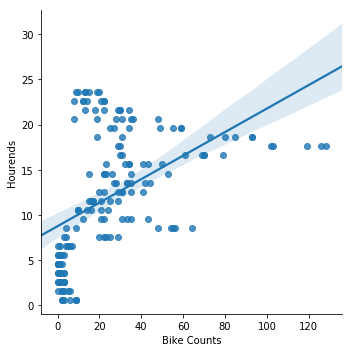

In [11]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42)

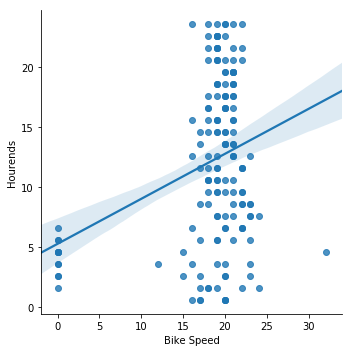

In [12]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42)

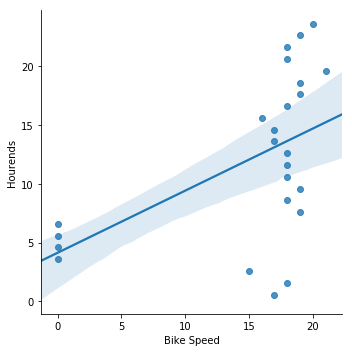

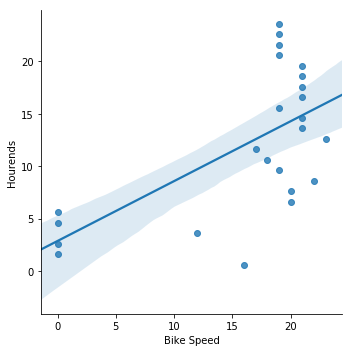

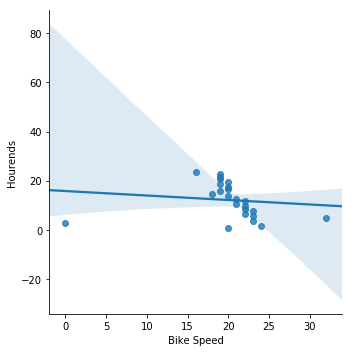

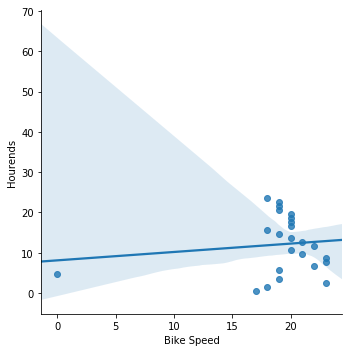

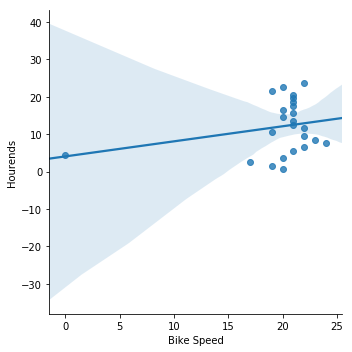

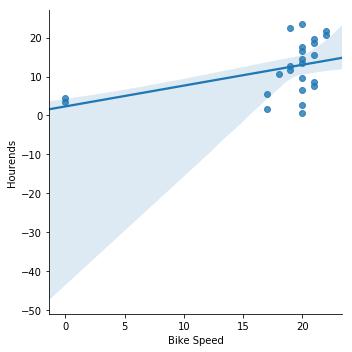

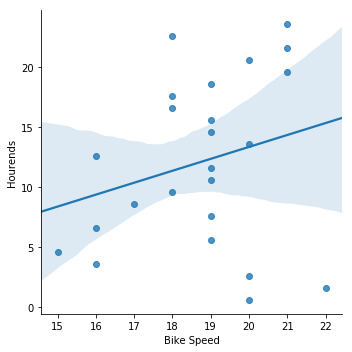

In [14]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc42day7)

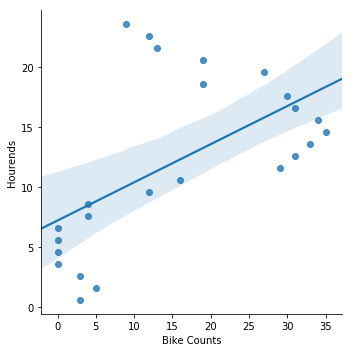

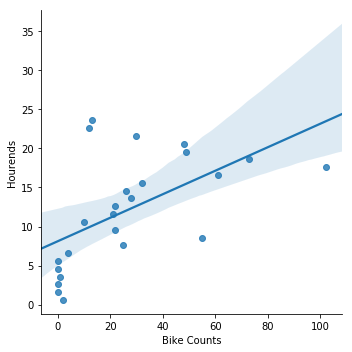

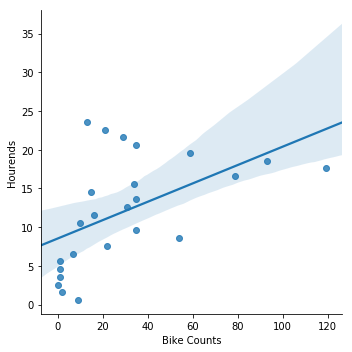

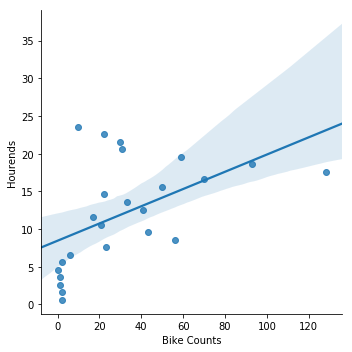

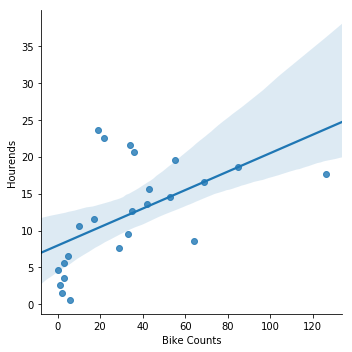

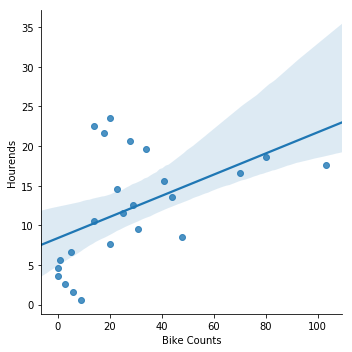

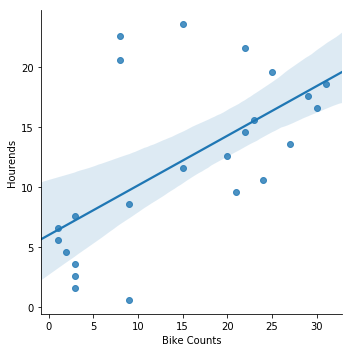

In [15]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc42day7)